# General Tips

* Know your tools: Be able to answer any question you have about the data quickly
* Map out your data: how are various tables related?
* Use logic and creativity (not canned functions) to engineer features
* Practice, practice, practice!

# Example: Healthcare Provider Fraud

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [9]:
patients = pd.read_csv('patient_data/beneficiary.csv')
patients

,BID,DOB,DOD,Gender,Race,RenalDisease,State,County,NumOfMonths_PartACov,NumOfMonths_PartBCov,...,Chronic_Depression,Chronic_Diabetes,Chronic_IschemicHeart,Chronic_Osteoporasis,Chronic_rheumatoidarthritis,Chronic_stroke,InpatientAnnualReimbursementAmt,InpatientAnnualDeductibleAmt,OutpatientAnnualReimbursementAmt,OutpatientAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138551,BENE159194,1939-07-01,NaN,1,1,0,39,140,12,12,...,2,2,2,2,2,2,0,0,430,460
138552,BENE159195,1938-12-01,NaN,2,1,0,49,530,12,12,...,2,1,2,2,2,2,0,0,880,100
138553,BENE159196,1916-06-01,NaN,2,1,0,6,150,12,12,...,1,1,1,2,2,2,2000,1068,3240,1390
138554,BENE159197,1930-01-01,NaN,1,1,0,16,560,12,12,...,2,2,1,2,2,2,0,0,2650,10


In [10]:
claims = pd.read_csv('patient_data/inpatients.csv')
claims

,BID,CID,StartDt,EndDt,PID,AmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,DiagnosisCode_7,DiagnosisCode_8,DiagnosisCode_9,DiagnosisCode_10,ProcedureCode_1,ProcedureCode_2,ProcedureCode_3,ProcedureCode_4,ProcedureCode_5,ProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40469,BENE159167,CLM69886,2009-09-28,2009-10-02,PRV53671,7000,PHY345332,PHY319565,NaN,2009-09-28,...,79092,70704,2869,4148,9904.0,NaN,NaN,NaN,NaN,NaN
40470,BENE159175,CLM74504,2009-11-03,2009-11-06,PRV54981,4000,PHY342806,PHY365497,NaN,2009-11-03,...,49122,4254,5990,NaN,8605.0,NaN,NaN,NaN,NaN,NaN
40471,BENE159177,CLM76485,2009-11-18,2009-11-22,PRV56588,3000,PHY423220,PHY332752,NaN,2009-11-18,...,71534,71590,V4502,NaN,9390.0,NaN,NaN,NaN,NaN,NaN
40472,BENE159177,CLM79949,2009-12-17,2009-12-18,PRV56575,5000,PHY353156,NaN,NaN,2009-12-17,...,4263,0414,41400,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
providers = pd.read_csv('patient_data/providers.csv')
providers

,PID,Fraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No
...,...,...
5405,PRV57759,No
5406,PRV57760,No
5407,PRV57761,No
5408,PRV57762,No


## Questions

### 1. What are the primary keys / foreign keys for each table?

    * Patients: 
        * Primary = BID
    * Claims:
        * Primary: CID
        * Foreign: BID, PID
    * Providers:
        * Primary: PID

### 2. How would you join these tables together for feature engineering purposes?


```
providers LEFT JOIN claims USING (PID)
          LEFT JOIN patients USING (BID)
```

### 3. Analyze `AttendingPhysician` column, what are some ideas of how to feature engineer it?

In [14]:
claims.AttendingPhysician.describe()

count         40362
unique        11604
top       PHY422134
freq            386
Name: AttendingPhysician, dtype: object

,0
count,400.000000
mean,43.297500
std,41.010714
min,15.000000
25%,20.000000
50%,29.000000
75%,48.250000
max,386.000000


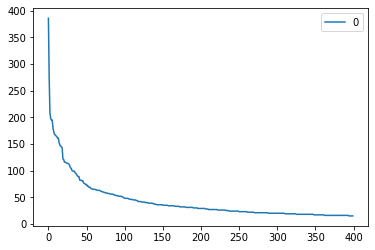

In [35]:
from collections import Counter
top = Counter(claims.AttendingPhysician).most_common(400)
df = pd.DataFrame([x[1] for x in top])
df.plot()
df.describe()

Ideas:
* Bucket physicians by how many claims they were involved
* Binary indicator of large number of cases or not

Bad Ideas:
* Categorical encode it (too many values)

### 4. Analyze `DiagnosisCode_X`, what are some ideas of how to feature engineer it?

In [38]:
claims.columns

Index(['BID', 'CID', 'StartDt', 'EndDt', 'PID', 'AmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'AdmitDiagnosisCode', 'DeductibleAmt', 'DischargeDt',
       'DiagnosisGroupCode', 'DiagnosisCode_1', 'DiagnosisCode_2',
       'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5',
       'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8',
       'DiagnosisCode_9', 'DiagnosisCode_10', 'ProcedureCode_1',
       'ProcedureCode_2', 'ProcedureCode_3', 'ProcedureCode_4',
       'ProcedureCode_5', 'ProcedureCode_6'],
      dtype='object')

In [41]:
claims[['CID', 'DiagnosisCode_1', 'DiagnosisCode_2',
       'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5',
       'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8',
       'DiagnosisCode_9', 'DiagnosisCode_10']].describe()

,CID,DiagnosisCode_1,DiagnosisCode_2,DiagnosisCode_3,DiagnosisCode_4,DiagnosisCode_5,DiagnosisCode_6,DiagnosisCode_7,DiagnosisCode_8,DiagnosisCode_9,DiagnosisCode_10
count,40474,40474,40248,39798,38940,37580,35636,33216,30532,26977,3927
unique,40474,2254,2439,2427,2441,2374,2358,2310,2243,2094,952
top,CLM64763,486,4019,4019,4019,4019,4019,4019,4019,4019,4019
freq,1,1499,2484,2282,2100,1889,1620,1402,1200,965,128


In [54]:
codes = set()
for x in ['DiagnosisCode_1', 'DiagnosisCode_2', 'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5', 
          'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8', 'DiagnosisCode_9', 'DiagnosisCode_10']:
    codes = codes | set(claims[x].unique())
print(len(codes))
list(codes)[:20]

4717


[nan,
 '5960',
 '3319',
 '8442',
 '33391',
 '5568',
 '80605',
 '7992',
 '5934',
 '78449',
 '81203',
 '6961',
 '5692',
 '80711',
 'E8880',
 '1145',
 '29289',
 '70700',
 '99830',
 '8728']

In [56]:
codes = Counter()
cols = ['DiagnosisCode_1', 'DiagnosisCode_2', 'DiagnosisCode_3', 'DiagnosisCode_4', 'DiagnosisCode_5', 
          'DiagnosisCode_6', 'DiagnosisCode_7', 'DiagnosisCode_8', 'DiagnosisCode_9', 'DiagnosisCode_10']
for index, row in claims.iterrows():
    codes.update(row[cols])
print(len(codes))
codes.most_common()

4717


[(nan, 77412),
 ('4019', 14153),
 ('2724', 7340),
 ('25000', 7334),
 ('41401', 6442),
 ('4280', 6190),
 ('42731', 6070),
 ('5990', 5390),
 ('53081', 4912),
 ('2449', 4205)]

Ideas:
    
* Features for most common diagnosis codes
* Buckets for frequency the diagnosis code occurs
* Try to decode diagnosis codes into other hierarchy?
* Number of diagnosis codes per claim

###  5. How can we generate features for providers based on patient and claim data?

Ideas:
    
* Aggregate claims to providers
* Aggregate beneficiaries to providers
* Claims:
    * Detect outliers